In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 


In [0]:
#now we import the datasets from github directly
url_test='https://raw.githubusercontent.com/Sounak97/Machine_Learning_Exercises/master/UnivariteLinearRegression/Datasets/test.csv'
url_train='https://raw.githubusercontent.com/Sounak97/Machine_Learning_Exercises/master/UnivariteLinearRegression/Datasets/train.csv'


In [0]:
data_train=pd.read_csv(url_train)
data_test=pd.read_csv(url_test)

In [55]:
print(data_train.shape)
print(data_test.shape)

(700, 2)
(300, 2)


In [0]:
x_train=data_train.iloc[:,:-1].values
y_train=data_train.iloc[:,1].values
x_test=data_test.iloc[:,:-1].values
y_test=data_test.iloc[:,1].values

x_dftrain=pd.DataFrame(x_train)
y_dftrain=pd.DataFrame(y_train)

x_dftest=pd.DataFrame(x_test)
y_dftest=pd.DataFrame(y_test)

In [57]:
print(x_train.shape)
print(x_test.shape)

(700, 1)
(300, 1)


In [0]:
linReg=LinearRegression()


In [0]:
def _assert_all_finite(X, allow_nan=False):
    """Like assert_all_finite, but only for ndarray."""
    # validation is also imported in extmath
    from .extmath import _safe_accumulator_op

    if _get_config()['assume_finite']:
        return
    X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method. The sum is also calculated
    # safely to reduce dtype induced overflows.
    is_float = X.dtype.kind in 'fc'
    if is_float and (np.isfinite(_safe_accumulator_op(np.sum, X))):
        pass
    elif is_float:
        msg_err = "Input contains {} or a value too large for {!r}."
        if (allow_nan and np.isinf(X).any() or
                not allow_nan and not np.isfinite(X).all()):
            type_err = 'infinity' if allow_nan else 'NaN, infinity'
            raise ValueError(msg_err.format(type_err, X.dtype))
    # for object dtype data, we only check for NaNs (GH-13254)
    elif X.dtype == np.dtype('object') and not allow_nan:
        if _object_dtype_isnan(X).any():
            raise ValueError("Input contains NaN")


In [60]:
'''clean_dataset(x_dftrain)
clean_dataset(y_dftrain)
clean_dataset(x_dftest)
clean_dataset(y_dftest)'''

'''x_dftrain[~x_dftrain.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
y_dftrain[~y_dftrain.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
x_dftest[~x_dftest.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
y_dftest[~y_dftest.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)'''

'x_dftrain[~x_dftrain.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)\ny_dftrain[~y_dftrain.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)\nx_dftest[~x_dftest.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)\ny_dftest[~y_dftest.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)'

In [61]:
x_dftest.fillna(x_dftest.mean())
y_dftest.fillna(y_dftest.mean())
y_dftrain.fillna(y_dftrain.mean())
x_dftrain.fillna(x_dftrain.mean())

,0
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
5,36.0
6,12.0
7,81.0
8,25.0
9,5.0


In [0]:
x_dftrain[x_dftrain==np.inf]=np.nan
x_dftrain.fillna(x_dftrain.mean(), inplace=True)
y_dftrain[y_dftrain==np.inf]=np.nan
y_dftrain.fillna(y_dftrain.mean(), inplace=True)
x_dftest[x_dftest==np.inf]=np.nan
x_dftest.fillna(x_dftest.mean(), inplace=True)
y_dftest[y_dftest==np.inf]=np.nan
y_dftest.fillna(y_dftest.mean(), inplace=True)

In [63]:
'''x_dftrain = x_dftrain.reset_index()
y_dftrain = y_dftrain.reset_index()'''

x_dftrain.drop(x_dftrain.index[[699]])

,0
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
5,36.0
6,12.0
7,81.0
8,25.0
9,5.0


In [64]:
linReg.fit(x_dftrain,y_dftrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred=linReg.predict(x_test)

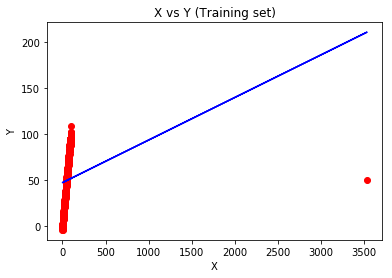

In [68]:
plt.scatter(x_dftrain, y_dftrain, color = 'red')
plt.plot(x_dftrain, linReg.predict(x_dftrain), color = 'blue')
plt.title('X vs Y (Training set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


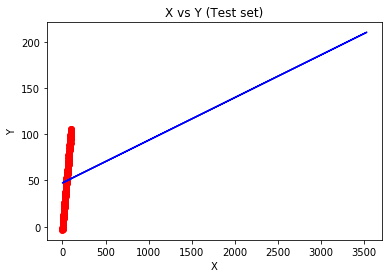

In [72]:
plt.scatter(x_dftest, y_dftest, color = 'red')
plt.plot(x_dftrain, linReg.predict(x_dftrain), color = 'blue')
plt.title('X vs Y (Test set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [0]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_dftest, pred)